# Desafío - Inferencia de tópicos con EM

Requerimientos
- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los ​csv​ se encuentra en la carpeta ​dump​.
- Cada ​csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción.
- Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.

# Ejercicio 1: Preparar el ambiente de trabajo

- Importe los módulos ​numpy​, ​pandas​, ​matplotlib​, ​seaborn​, ​glob y ​os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta ​dump​.
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en ​dump utilizando ​glob.glob y ​os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto ​pd.DataFrame​ que contenga todos los ​csv​.
- Asegúrese de eliminar la columna ​Unnamed: ​0​ que se genera por defecto.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.78 s (started: 2021-10-17 17:25:59 -03:00)


In [7]:
path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/3 .-Algoritmos de clasificación (II)/Desafíos/dump/*"
path_casa = "dump/*"

df = pd.DataFrame()

for name in glob.glob(path_casa):
    df = df.append(pd.read_csv(name))

df = df.drop(columns = 'Unnamed: 0').rename(columns = {"0":"Artista", "1":"Género","2":"Canción","3":"Letra"})
df.head()

,Artista,Género,Canción,Letra
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


time: 359 ms (started: 2021-10-17 17:26:01 -03:00)


# Ejercicio 2: Matriz de ocurrencias

- Importe la clase ​CountVectorizer dentro de los módulos ​feature_extraction.text de la librería ​sklearn​.
- Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
- Con la clase inicializada, incorpore las letras con el método ​fit_transform y guarde los resultados en un nuevo objeto.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#inicialize
count_vectorizer = CountVectorizer(lowercase = True, max_features = 5000, stop_words = 'english')

#fiteo
count_vectorizer_fit = count_vectorizer.fit_transform(df['Letra'])

time: 1.5 s (started: 2021-10-17 17:26:01 -03:00)


# Ejercicio 3: Entrenamiento del Modelo

## a) Importe ​sklearn.decomposition.LatentDirichletAllocation y sklearn.model_selection.GridSearchCV​.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

time: 109 ms (started: 2021-10-17 17:26:03 -03:00)


## b) Genere una búsqueda de grilla con los siguientes hiperparámetros:
    ○ n_components: [5, 10, 15].
    ○ learning_decay: [0.7, 0.5].

**y Entrene la búsqueda de grilla con las letras en un formato vectorizado con CountVectorizer.**

In [10]:
#Definimos los parámetros y los valores a buscar en la grilla
parameters = {'n_components':[5,10,15], 'learning_decay':[0.7, 0.5]}

#Creamos nuestro X
X = df['Letra']

#instanciamos la grilla con el modelo y parameters
model_lda = GridSearchCV(LatentDirichletAllocation(), parameters).fit(count_vectorizer_fit)
model_lda

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.7, 0.5],
                         'n_components': [5, 10, 15]})

time: 18min 18s (started: 2021-10-17 17:26:09 -03:00)


## c) Reporte brevemente cuál es la mejor combinación de hiperparámetros.

In [13]:
model_lda.best_params_

{'learning_decay': 0.5, 'n_components': 5}

time: 0 ns (started: 2021-10-17 18:16:43 -03:00)


In [14]:
model_lda.best_score_

-1856390.0389317055

time: 0 ns (started: 2021-10-17 18:19:24 -03:00)


**Comentario**

La mejor combinación es con learning_decay = 0.5 y con n_components = 5.

Digresión: Latent Dirichlet Allocation

Latent Dirichlet Allocatio (LDA) es un modelo probabilístico generativo basado en Inferencia Variacional EM. La principal utilidad de esto es la identificación de tópicos en un corpus de texto. El proceso de inferencia se puede resumir en los siguientes pasos:

- Cada documento dentro del corpus se puede entender como una mezcla de tópicos
comunes a nivel de corpus​.
- Esta mezcla de tópicos es latente: sólo observamos los documentos registrados y sus palabras.
- La API de ​sklearn.decomposition.LatentDirichletAllocation presenta la misma
funcionalidad de todo modelo de sklearn. Algunos puntos a considerar en la
inicialización de la clase son:

    ○ n_components​: Cantidad de tópicos a inferir en un corpus.

    ○ learning_method​: Forma en la que entran los datos en entrenamiento. Cuando es 'batch', se ingresa la matriz de entrenamiento completa. Cuando es 'online', la matriz de entrenamiento ingresa de manera secuencial en parcelas pequeñas.

    ○ l​earning_decay​: Tasa de aprendizaje en la función de pérdida. Cuando se
    implementa con ​learning_method=​'online'​, el modelo se entrena con
    Gradiente Estocástico Descendente.
    
    ○ Perplejidad​: Busca aproximar el número óptimo de tópicos a inferir.
    Técnicamente evalúa qué tan bien predice una muestra específica. En función a un número de tópicos, define la distribución teórica de palabras representada por los tópicos y la compara con la ocurrencia empírica de palabras en tópicos.

# Ejercicio 4 : Inferencia e Identificación de Tópicos


# a) En base a la mejor combinación de hiperparámetros, entrene el modelo con la matriz de atributos de las letras

Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:

    # mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
    for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([counter.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

In [114]:
best_lda = LatentDirichletAllocation(n_components=5, learning_decay=0.5)
fit_best_lda = best_lda.fit(count_vectorizer_fit)

time: 41.5 s (started: 2021-10-17 20:02:44 -03:00)


In [50]:
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud 
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
don just know ll love ve let baby want come time got like way make
tópico: 2
oh yeah love hey la know just baby ooh don whoa say like man said
tópico: 3
life god world death die blood dead eyes time man black light soul like ll
tópico: 4
like shit got don yo ain fuck nigga em man know just cause niggas bitch
tópico: 5
got like don know just ah rock cause wanna right ain people ya yeah everybody
time: 141 ms (started: 2021-10-17 18:49:57 -03:00)


## b) Comente a qué tópicos está asociada cada clase inferida.

In [106]:
df['Género'].unique()

array(['metal', 'hiphop', 'rock', 'pop'], dtype=object)

time: 0 ns (started: 2021-10-17 19:13:12 -03:00)


**Comentario**

Bueno, si tuviera que adivinar...... serían:

* Tópico 1: Pop?
* Tópico 2: Pop
* Tópico 3: Metal
* Tópico 4: Hiphop
* Tópico 5: Rock

# Ejercicio 5: Identificación de probabilidades
- En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
-  Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. Podemos implementar esto de la siguiente manera:

        # generamos una transformación de los datos a distribución de tópico por palabra en el documento
        fit_best_lda = best_lda.transform(transformed_feats)

        # estra transformación la podemos coercionar a un dataframe de la siguiente manera:        ​
        topics_for_each_doc = pd.DataFrame(
        ​# pasamos esta matriz y la redondeamos en 3 decimales
        np.round(fit_best_lda, ​3​),
        ​# agregamos un índice
        index=df_lyrics.index
        )
        
        # agregamos identificadores de columna
        ​topics_for_each_doc.columns = list(map(​lambda​ x: ​"T: {}"​.format(x),
        range(​1​, best_lda.n_components + ​1​)))
        ​
        # concatenamos las probabilidades de tópico por documento a nuestra matriz original
        ​concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=​1​)
        
        # argmax en la matriz de tópicos
        concatenated_df[​'highest_topic'​] = np.argmax(docs_topics.values, axis=​1​) + 1

## a) Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.

In [119]:
docs_topics = ['T: 1', 'T: 2', 'T: 3', 'T: 4', 'T: 5']

time: 0 ns (started: 2021-10-17 20:06:45 -03:00)


In [123]:
#Bueno, primero correremos el código anterior

# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(count_vectorizer_fit)

# estra transformación la podemos coercionar a un dataframe de la siguiente manera:        
topics_for_each_doc = pd.DataFrame(

np.round(fit_best_lda, 3), # pasamos esta matriz y la redondeamos en 3 decimales
index=df.index
) # agregamos un índice

# agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda.n_components + 1)))

# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df, topics_for_each_doc], axis=1)

# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(concatenated_df[docs_topics].values, axis=1) + 1

concatenated_df.head()

,Artista,Género,Canción,Letra,T: 1,T: 2,T: 3,T: 4,T: 5,highest_topic
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee...",0.006,0.006,0.888,0.096,0.006,3
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...,0.005,0.307,0.678,0.005,0.005,3
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...,0.645,0.002,0.002,0.350,0.002,1
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...,0.133,0.399,0.462,0.003,0.003,3
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...,0.003,0.003,0.855,0.136,0.003,3


time: 2.61 s (started: 2021-10-17 20:09:13 -03:00)


## b) Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.

In [140]:
#Sólo por conveniencia, elegiré 'Britney Spears' (lol)
graf = concatenated_df.query("Artista == 'Britney Spears'")['highest_topic'].value_counts('%')
graf

4    0.597523
2    0.321981
5    0.052632
1    0.015480
3    0.012384
Name: highest_topic, dtype: float64

time: 0 ns (started: 2021-10-17 20:18:49 -03:00)


**Comentario**

Al parecer Britney Spears se asocia más al tópico 4 con un 59,7% y al tópico 2 con un 32,1%

## c) Grafique la distribución de las probabilidades para algún artista en específico.

<AxesSubplot:>

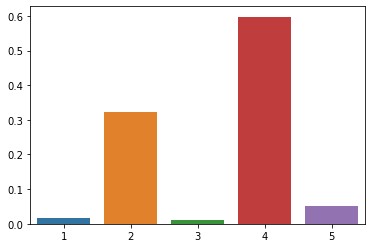

time: 93 ms (started: 2021-10-17 20:19:06 -03:00)


In [141]:
#Seguimos con Britney Spears!
import seaborn as sns
sns.barplot(x = graf.index, y = graf.values)